In [56]:
import numpy as np
import zipfile as zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics


Digit Dataset

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()

In [5]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
digits_data = np.vstack([train_data,test_data])
digits_labels= np.hstack([train_labels,test_labels])

In [6]:
digits_data.shape # 70000 image matrices 28x28

(70000, 28, 28)

In [7]:
a = np.unique(digits_labels)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Text(0.5, 1.0, 'Class :3')

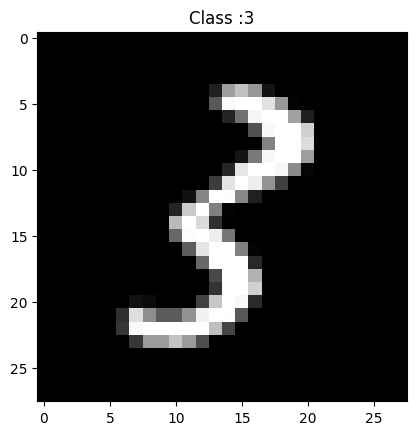

In [7]:
random_index = np.random.randint(0,train_data.shape[0])
plt.imshow(digits_data[random_index], cmap= 'gray')
plt.title('Class :'+ str(digits_labels[random_index]))

**A-Z DATASET**

In [8]:
dataset_az = pd.read_csv(r"C:\Users\Enes\Desktop\OCR\A_Z Handwritten Data\A_Z Handwritten Data.csv")

In [9]:
dataset_az.shape

(372450, 785)

In [10]:
alfabet_data = dataset_az.drop('0',axis=1)
alfabet_labels = dataset_az['0']
alfabet_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
alfabet_data.shape, alfabet_labels.shape

((372450, 784), (372450,))

In [12]:
alfabet_labels

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

In [13]:
alfabet_data = np.reshape(alfabet_data.values, (alfabet_data.shape[0],28,28))

value counts    Harf   Sayı
0     A  13869
1     B   8668
2     C  23409
3     D  10134
4     E  11440
5     F   1163
6     G   5762
7     H   7218
8     I   1120
9     J   8493
10    K   5603
11    L  11586
12    M  12336
13    N  19010
14    O  57825
15    P  19341
16    Q   5812
17    R  11566
18    S  48419
19    T  22495
20    U  29008
21    V   4182
22    W  10784
23    X   6272
24    Y  10859
25    Z   6076


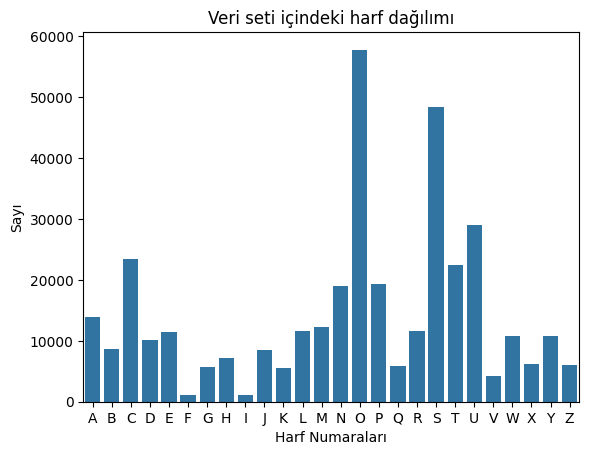

In [14]:
# Değerlerin sayısını hesaplama
value_counts = alfabet_labels.value_counts().sort_index().reset_index()
value_counts.columns = ['Harf', 'Sayı']

# Harf etiketlerini atama
alfabet_name_labels = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
value_counts['Harf'] = value_counts['Harf'].apply(lambda x: alfabet_name_labels[x])

print("value counts", value_counts)

# Grafik oluşturma
sns.barplot(x='Harf', y='Sayı', data=value_counts)
plt.xlabel('Harf Numaraları')
plt.ylabel('Sayı')
plt.title('Veri seti içindeki harf dağılımı')
plt.show()

In [16]:
# Değerlerin sayısını hesaplama
value_counts = digits_labels.value_counts().sort_index().reset_index()
value_counts.columns = ['Rakam', 'Sayı']

# Harf etiketlerini atama
digit_name_labels = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
value_counts['Harf'] = value_counts['Harf'].apply(lambda x: digit_name_labels[x])

print("value counts", value_counts)

# Grafik oluşturma
sns.barplot(x='Harf', y='Sayı', data=value_counts)
plt.xlabel('Harf Numaraları')
plt.ylabel('Sayı')
plt.title('Veri seti içindeki harf dağılımı')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [17]:
alfabet_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Class 3')

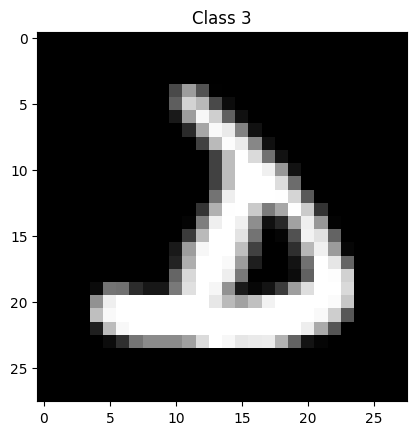

In [18]:
plt.imshow(alfabet_data[51512],cmap="gray")
plt.title("Class "+str(alfabet_labels[51512]))  # 0->A, 1->B, 2->C...

In [19]:
alfabet_labels, np.unique(alfabet_labels)

(0          0
 1          0
 2          0
 3          0
 4          0
           ..
 372445    25
 372446    25
 372447    25
 372448    25
 372449    25
 Name: 0, Length: 372450, dtype: int64,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64))

In [20]:
alfabet_labels +=10 # to avoid conflicts 

In [21]:
alfabet_labels.shape

(372450,)

In [22]:
data = np.vstack([alfabet_data, digits_data])
labels = np.hstack([alfabet_labels,digits_labels])

In [23]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [24]:
data = np.array(data, dtype='float32')

In [25]:
np.unique(labels)   # (1-9) -> 0-9 , (10-25) -> A-Z

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [26]:
data = np.expand_dims(data, axis= -1)

In [27]:
data.shape

(442450, 28, 28, 1)

Data Preprocessing

In [28]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [29]:
data/=255# normalization

In [30]:
np.unique(labels), len(np.unique(labels)) # there will be 36 output classes at the end

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35], dtype=int64),
 36)

In [31]:
le = LabelBinarizer()
labels = le.fit_transform(labels)  # ONE - HOT Encoder   A B C 
                                                       # 0 0 1

In [32]:
np.unique(labels)

array([0, 1])

In [33]:
labels[0] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

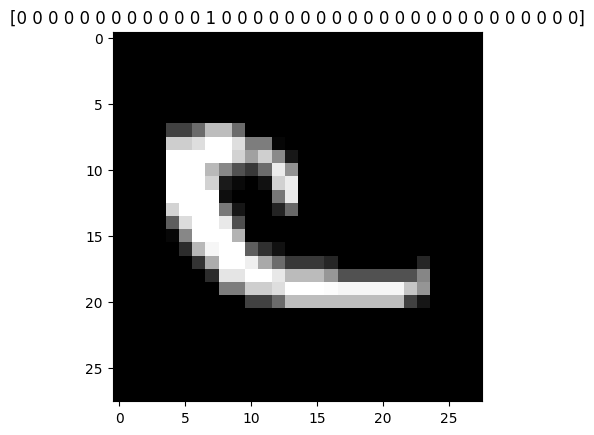

In [34]:
plt.imshow(data[40000],cmap='gray')
plt.title(labels[40000])

In [35]:
classes_total = labels.sum(0)

In [36]:
classes_total.shape

(36,)

In [37]:
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [38]:
classes_total.max()

57825

In [39]:
classes_weights = {}
for i in range(0 , len(classes_total)):
    classes_weights[i]= classes_total.max()/classes_total[i]

In [40]:
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [41]:
X_train , X_test , y_train , y_test = train_test_split(data,labels,test_size=0.2,random_state=1,stratify=labels)

In [42]:
X_train.shape , X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [43]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
augmentation = ImageDataGenerator(rotation_range=10,zoom_range=0.05,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False)

Build the Neural Network

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint


In [114]:
network = Sequential()
network.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64,activation='relu'))
network.add(Dense(128,activation='relu'))  # dense is fully-connected layer

network.add(Dense(36,activation='softmax'))

network.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [115]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)       

In [47]:
name_labels = '0123456789'
name_labels+="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
name_labels = [l  for l in name_labels]

In [35]:
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


TRAIN THE NETWORK

In [52]:
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128


In [119]:
checkpointer= ModelCheckpoint(file_model,monitor='val_loss',verbose=1,save_best_only=True)

In [120]:
"""history= network.fit(augmentation.flow(X_train,y_train,batch_size=batch_size),
                                       validation_data=(X_test,y_test),
                                       steps_per_epoch=len(X_train)//batch_size,epochs=epochs,
                                       class_weight=classes_weights,verbose=1,callbacks = [checkpointer])"""

Epoch 1/20
2763/2765 [============================>.] - ETA: 0s - loss: 2.0668 - accuracy: 0.8322
Epoch 1: val_loss improved from inf to 0.28479, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model\assets
2765/2765 [==============================] - 83s 29ms/step - loss: 2.0661 - accuracy: 0.8322 - val_loss: 0.2848 - val_accuracy: 0.8702
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9312 - accuracy: 0.9033
Epoch 2: val_loss improved from 0.28479 to 0.26137, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model\assets
2765/2765 [==============================] - 83s 30ms/step - loss: 0.9312 - accuracy: 0.9033 - val_loss: 0.2614 - val_accuracy: 0.8830
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7965 - accuracy: 0.9131
Epoch 3: val_loss improved from 0.26137 to 0.19635, saving model to custom_ocr.model
INFO:tensorflow:Assets written to: custom_ocr.model\assets
2765/276

In [121]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.8.0
Num GPUs Available:  1


In [122]:
X_test.shape

(88490, 28, 28, 1)

In [123]:
import tensorflow as tf
tf.test.is_built_with_cuda()

True

In [124]:
predictions = network.predict(X_test,batch_size=batch_size)

In [125]:
predictions

array([[2.4698822e-01, 9.7707364e-10, 7.8954542e-07, ..., 3.7858023e-15,
        2.8622401e-07, 4.4068083e-09],
       [7.7788091e-24, 1.7173980e-08, 2.4253920e-11, ..., 6.0436871e-11,
        4.2585527e-12, 2.6114527e-11],
       [1.8537835e-13, 4.9446757e-21, 2.1573826e-16, ..., 3.0238876e-14,
        5.8202304e-14, 6.0906053e-19],
       ...,
       [3.6439857e-01, 3.0340804e-13, 1.8928179e-07, ..., 3.9388726e-17,
        9.4008740e-08, 1.8161895e-08],
       [6.0762594e-20, 8.0358853e-12, 1.4313593e-09, ..., 9.9970812e-01,
        8.0771379e-06, 1.0692083e-09],
       [5.3518605e-08, 1.3159221e-12, 5.7009387e-08, ..., 1.3444439e-26,
        6.7222556e-12, 7.7057893e-10]], dtype=float32)

In [126]:
predictions[0]

array([2.4698822e-01, 9.7707364e-10, 7.8954542e-07, 5.0296961e-07,
       3.3801930e-11, 6.4658991e-07, 3.8489598e-06, 4.9469481e-08,
       1.1483679e-06, 1.3569467e-05, 3.2645343e-07, 4.9380492e-06,
       1.4325914e-05, 3.1968316e-03, 8.7152934e-09, 3.1574315e-14,
       3.7896339e-06, 1.0440005e-10, 1.1823544e-16, 1.8289238e-05,
       3.8297911e-12, 2.6867746e-11, 4.0150191e-08, 9.6814993e-06,
       7.4037313e-01, 3.9924169e-05, 9.2858057e-03, 8.0308489e-09,
       1.6084539e-05, 1.1198431e-06, 2.6696445e-05, 1.0892147e-09,
       4.9028927e-08, 3.7858023e-15, 2.8622401e-07, 4.4068083e-09],
      dtype=float32)

In [127]:
np.argmax(predictions[23])

28

In [128]:
name_labels[23]

'N'

In [129]:
y_test[23]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [130]:
np.argmax(y_test[23])

28

In [131]:
network.evaluate(X_test,y_test)

   1/2766 [..............................] - ETA: 1:04 - loss: 0.0900 - accuracy: 0.9688

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1720 - accuracy: 0.9407


[0.17198942601680756, 0.940739095211029]

In [132]:
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=name_labels))

              precision    recall  f1-score   support

           0       0.36      0.79      0.49      1381
           1       0.98      0.98      0.98      1575
           2       0.78      0.99      0.87      1398
           3       0.91      0.99      0.95      1428
           4       0.94      0.95      0.94      1365
           5       0.57      0.96      0.72      1263
           6       0.94      0.99      0.96      1375
           7       0.96      0.98      0.97      1459
           8       0.88      0.99      0.94      1365
           9       0.96      0.97      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.97      0.97      1734
           C       0.99      0.98      0.99      4682
           D       0.87      0.97      0.92      2027
           E       0.99      0.98      0.99      2288
           F       0.97      0.99      0.98       233
           G       0.95      0.95      0.95      1152
           H       0.99    

In [133]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

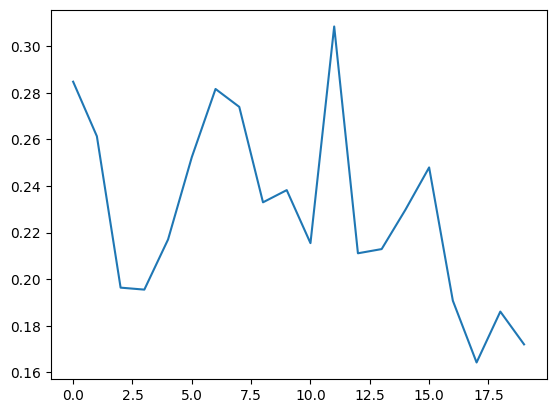

In [134]:
plt.plot(history.history["val_loss"])

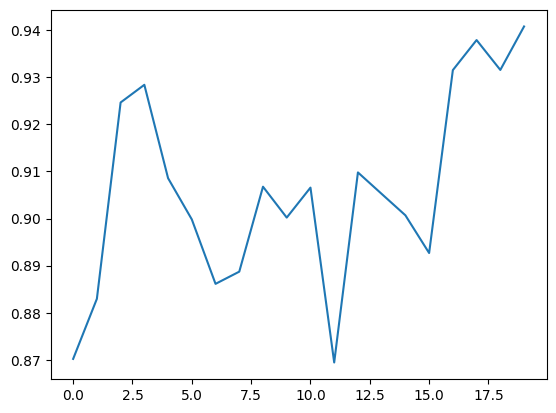

In [135]:
plt.plot(history.history["val_accuracy"])

SAVING THE MODEL

In [136]:
network.save("network",save_format = "h5")
#network.save("network",save_format = "tf")

TESTING THE MODEL

In [49]:
from tensorflow.keras.models import load_model

In [50]:
loaded_model = load_model(r"C:\Users\Enes\Desktop\OCR\network")

In [5]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)       

In [75]:
import cv2
img = cv2.imread(r"C:\Users\Enes\Desktop\OCR\x.png")
cv2.imshow("image",img)
cv2.waitKey()

-1

In [76]:
img.shape

(129, 99, 3)

In [77]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(129, 99)

In [78]:
cv2.imshow("gray image",gray)
cv2.waitKey()

-1

In [79]:
value, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2.imshow("gray",thresh)
cv2.waitKey()

-1

In [80]:
thresh.shape
img = cv2.resize(thresh,(28,28))
cv2.imshow("resized image",img)
cv2.waitKey()

-1

In [81]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=-1)
img = np.reshape(img, (1,28,28,1))
img.shape

(1, 28, 28, 1)

In [89]:
prediction1 = loaded_model.predict(img)
prediction1

array([[1.7028200e-02, 1.8913505e-10, 2.2810383e-01, 6.0647854e-04,
        8.6577522e-08, 1.2596806e-04, 7.3334975e-03, 1.8634661e-07,
        7.2507322e-02, 2.8279328e-05, 6.4550065e-08, 3.9339109e-04,
        3.2262433e-06, 4.5860877e-05, 3.0540302e-06, 5.8043488e-15,
        4.3621533e-02, 9.5580072e-11, 4.2277434e-20, 2.2066921e-10,
        1.6822710e-08, 3.0676912e-08, 9.4890087e-09, 7.1829905e-05,
        7.8902661e-04, 5.7000448e-06, 6.2912393e-01, 1.2703985e-04,
        1.6858759e-05, 1.1463647e-12, 5.4423567e-06, 8.2054748e-17,
        1.4066441e-06, 5.0393289e-15, 4.9804516e-06, 5.2762796e-05]],
      dtype=float32)

In [90]:
np.argmax(prediction1)

26

In [1]:
name_labels[26]

NameError: name 'name_labels' is not defined

              precision    recall  f1-score   support

           0       0.36      0.79      0.49      1381
           1       0.98      0.98      0.98      1575
           2       0.78      0.99      0.87      1398
           3       0.91      0.99      0.95      1428
           4       0.94      0.95      0.94      1365
           5       0.57      0.96      0.72      1263
           6       0.94      0.99      0.96      1375
           7       0.96      0.98      0.97      1459
           8       0.88      0.99      0.94      1365
           9       0.96      0.97      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.97      0.97      1734
           C       0.99      0.98      0.99      4682
           D       0.87      0.97      0.92      2027
           E       0.99      0.98      0.99      2288
           F       0.97      0.99      0.98       233
           G       0.95      0.95      0.95      1152
           H       0.99    

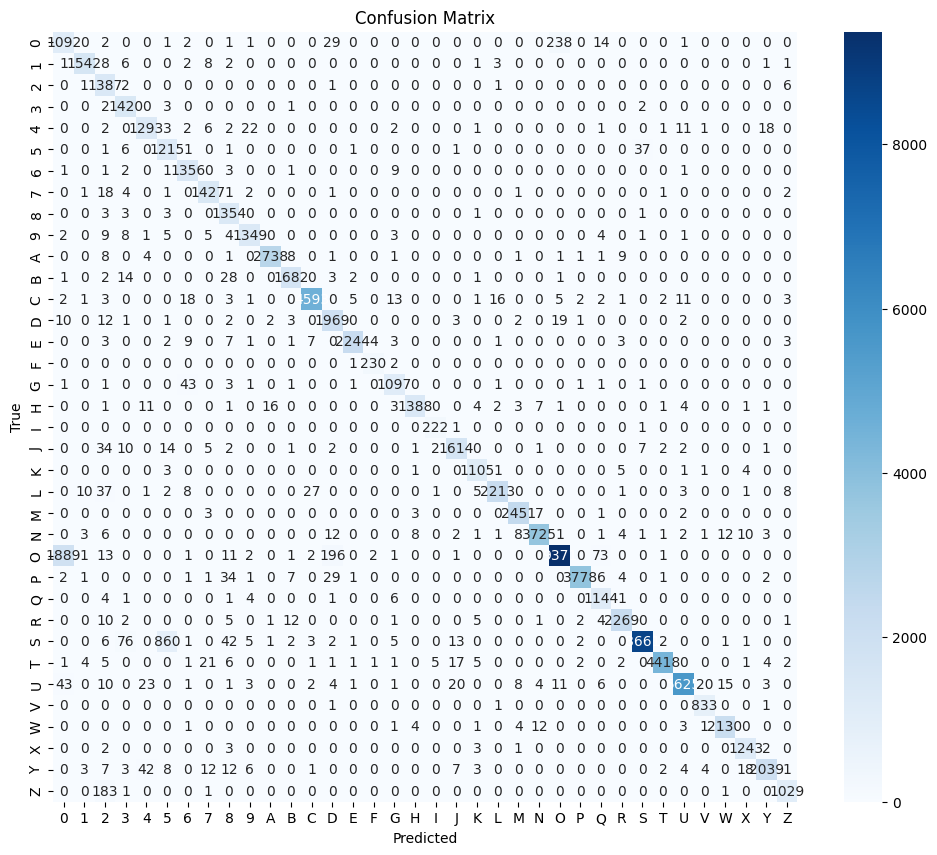

In [59]:
# Evaluate the model and print classification report
predictions = loaded_model.predict(X_test, batch_size=batch_size)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=name_labels))

# Compute confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=name_labels, yticklabels=name_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()